In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv("C:\\Users\\bvrvg\\Desktop\\Files\\ML\\Data sets\\diabetes.csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [2]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [3]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


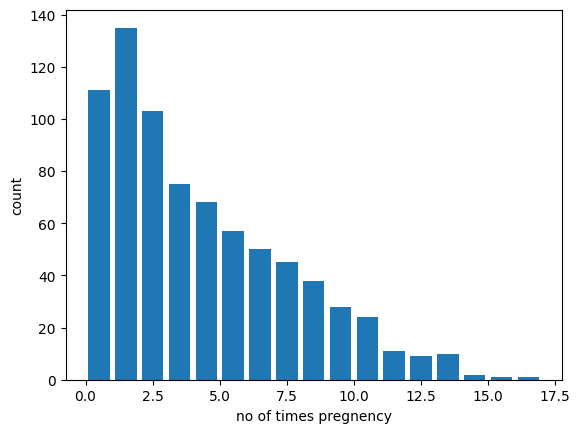

In [4]:
import matplotlib.pyplot as plt
plt.hist(df.Pregnancies,bins=17,rwidth=0.8)
plt.xlabel('no of times pregnency')
plt.ylabel('count')
plt.show()

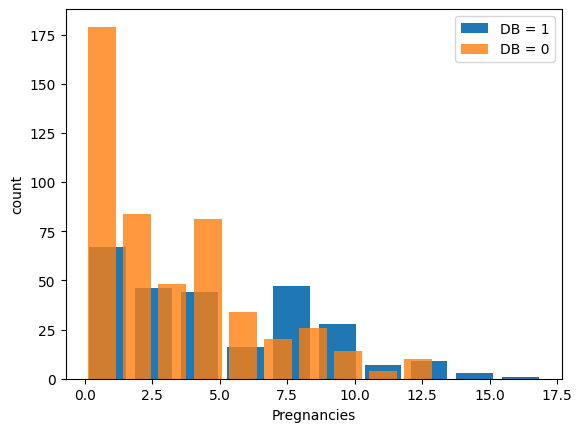

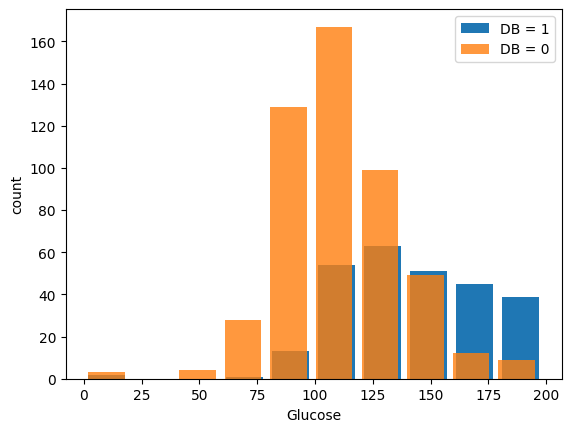

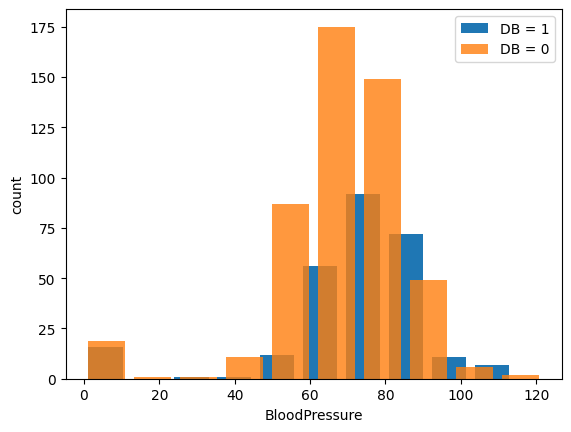

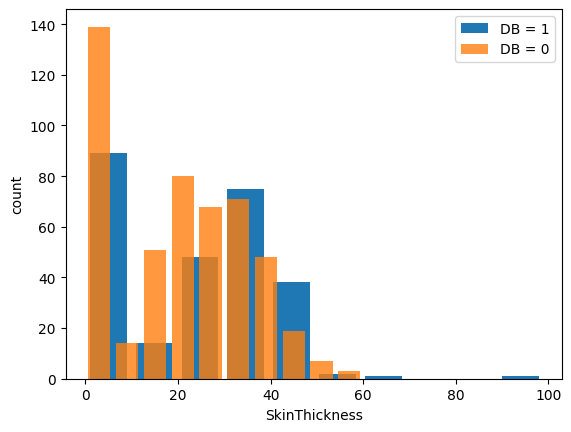

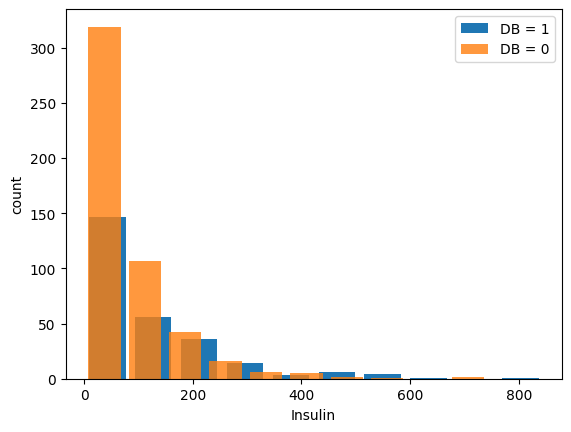

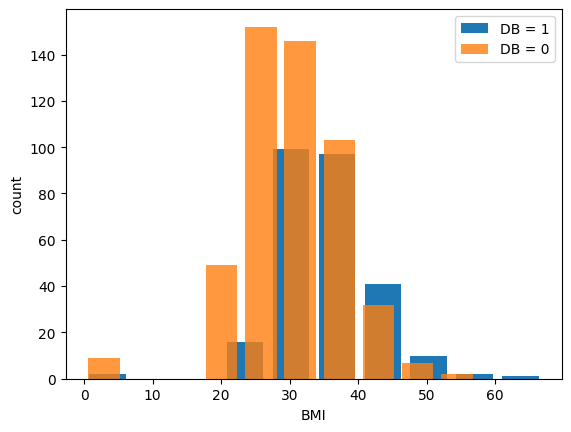

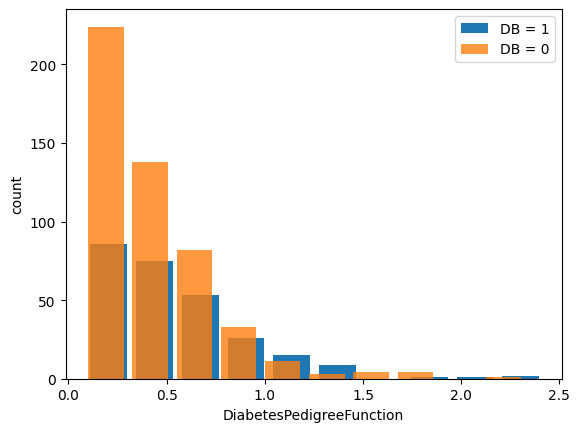

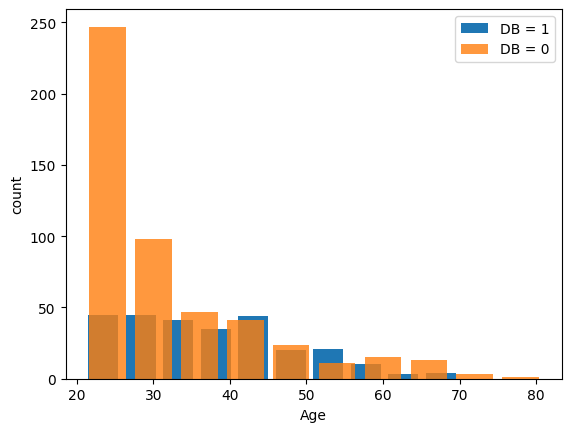

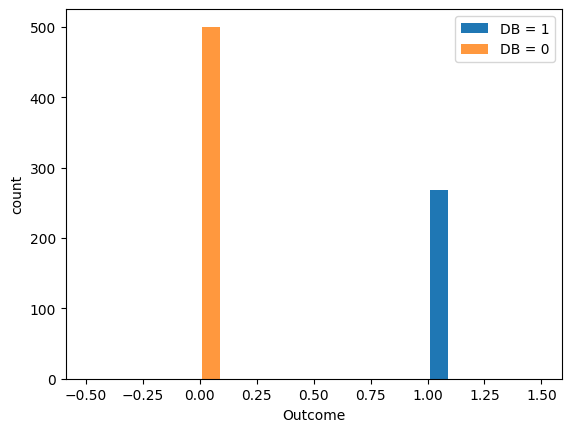

In [5]:
cols = df.columns
for col in cols:
    diabetes = df[df.Outcome==1][col]
    no_diabetes = df[df.Outcome==0][col]
    plt.hist(diabetes,rwidth=0.8,label='DB = 1')
    plt.hist(no_diabetes,rwidth=0.8,alpha=0.8,label='DB = 0')
    plt.xlabel(col)
    plt.ylabel('count')
    plt.legend()
    plt.show()

In [6]:
cols_percentil = {col : 0 for col in cols}
for col in cols_percentil:
    col_percentail = df[col].quantile([0.10,0.95])
    print(f'{col} : {col_percentail}')

Pregnancies : 0.10     0.0
0.95    10.0
Name: Pregnancies, dtype: float64
Glucose : 0.10     85.0
0.95    181.0
Name: Glucose, dtype: float64
BloodPressure : 0.10    54.0
0.95    90.0
Name: BloodPressure, dtype: float64
SkinThickness : 0.10     0.0
0.95    44.0
Name: SkinThickness, dtype: float64
Insulin : 0.10      0.0
0.95    293.0
Name: Insulin, dtype: float64
BMI : 0.10    23.600
0.95    44.395
Name: BMI, dtype: float64
DiabetesPedigreeFunction : 0.10    0.16500
0.95    1.13285
Name: DiabetesPedigreeFunction, dtype: float64
Age : 0.10    22.0
0.95    58.0
Name: Age, dtype: float64
Outcome : 0.10    0.0
0.95    1.0
Name: Outcome, dtype: float64


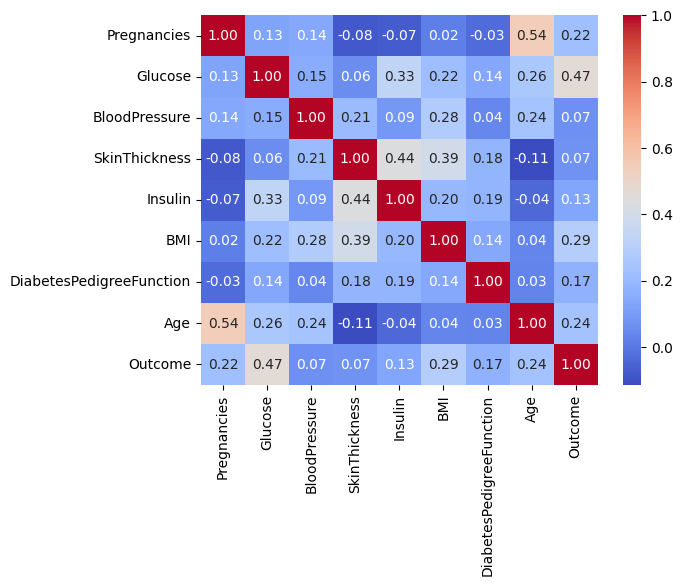

In [7]:
import seaborn as sns
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix,annot=True,cmap='coolwarm',fmt='.2f')
plt.show()

In [8]:
pregnency_ = df[(df.Pregnancies > 5) &(df.Outcome !=1)]['Pregnancies']
pregnency_.count()

108

In [9]:
df2 = df[~((df.Pregnancies >5) & (df.Outcome!=1) &((df.Glucose<70) | (df.Glucose>150))) ]
df2 = df2[~((df2.Pregnancies <5) & (df2.Outcome==1) &((df2.Glucose>70) | (df2.Glucose<150)))]

In [10]:
df2.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,615.000000,615.000000,615.000000,615.000000,615.000000,615.000000,615.000000,615.000000,615.000000
mean,4.193496,115.432520,69.211382,19.866667,73.291057,31.060976,0.445748,33.105691,0.214634
std,3.473955,29.676786,18.432486,15.247527,106.807209,7.851849,0.300542,11.769096,0.410903
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,96.000000,62.000000,0.000000,0.000000,26.000000,0.236500,24.000000,0.000000
50%,3.000000,111.000000,72.000000,22.000000,18.000000,30.900000,0.351000,29.000000,0.000000
75%,7.000000,131.000000,80.000000,32.000000,115.000000,35.800000,0.591000,41.000000,0.000000
max,17.000000,197.000000,122.000000,60.000000,744.000000,57.300000,2.329000,81.000000,1.000000


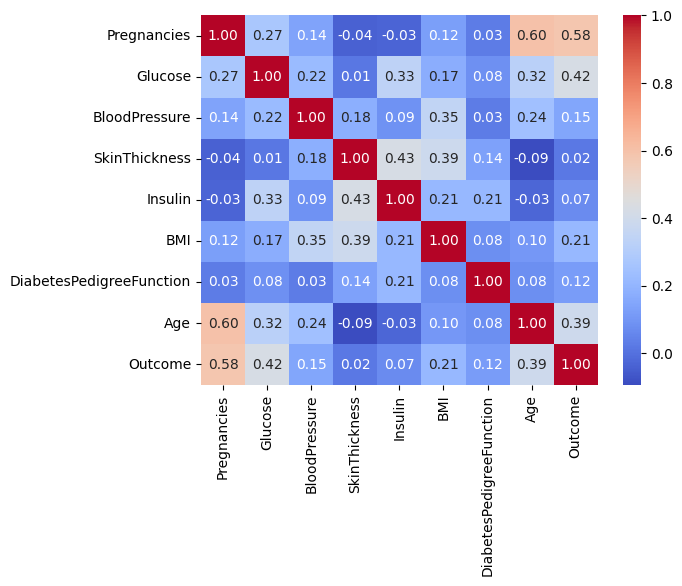

In [11]:
# df2 = df[(df.Pregnancies > 7) & (df.Outcome !=1)]
correlation_matrix = df2.corr()
sns.heatmap(correlation_matrix,annot=True,cmap='coolwarm',fmt='.2f')
plt.show()

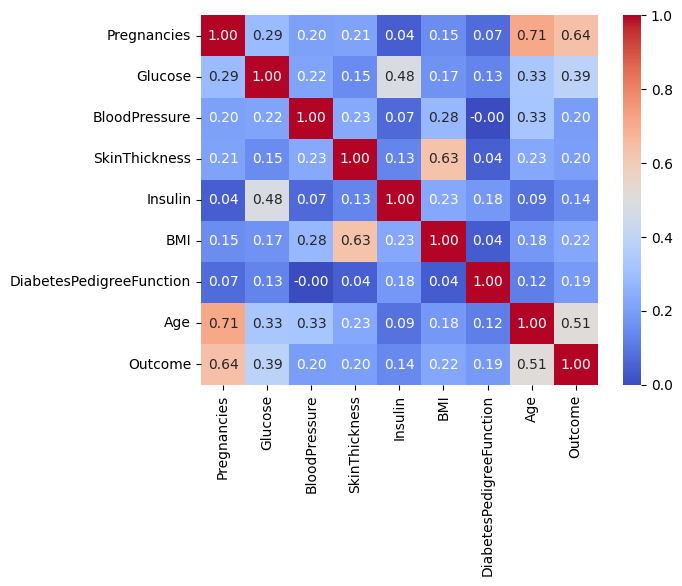

In [12]:
df3 = df2[(df2.SkinThickness>10) &(df2.SkinThickness<75)]
correlation_matrix = df3.corr()
sns.heatmap(correlation_matrix,annot=True,cmap='coolwarm',fmt='.2f')
plt.show()

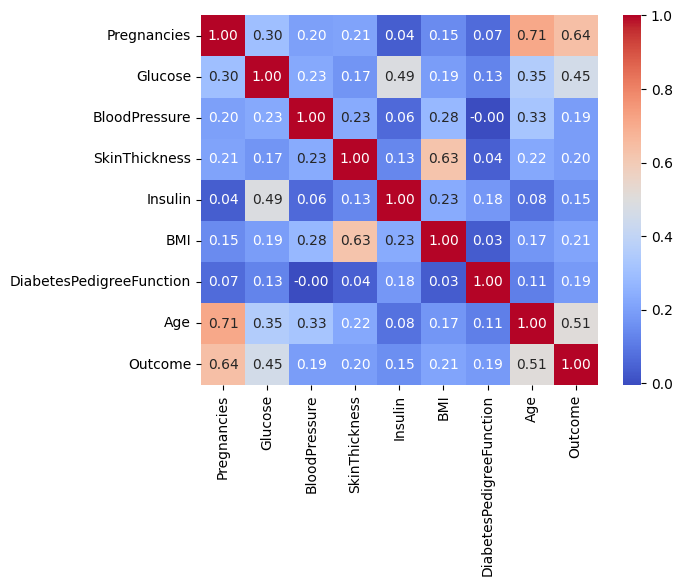

In [13]:
df4 = df3[~(df3.Glucose<25)]
correlation_matrix = df4.corr()
sns.heatmap(correlation_matrix,annot=True,cmap='coolwarm',fmt='.2f')
plt.show()

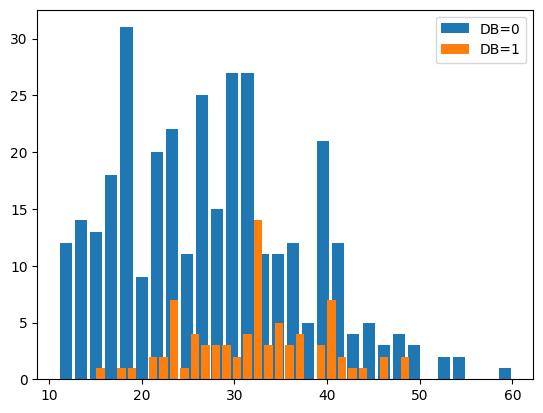

In [14]:
skin_DB1 = df4[df4.Outcome==1]['SkinThickness']
skin_DB0 = df4[df4.Outcome==0]['SkinThickness']
plt.hist(skin_DB0,rwidth=0.8,bins=30,label='DB=0')
plt.hist(skin_DB1,rwidth=0.8,bins=30,label='DB=1')
plt.legend()
plt.show()

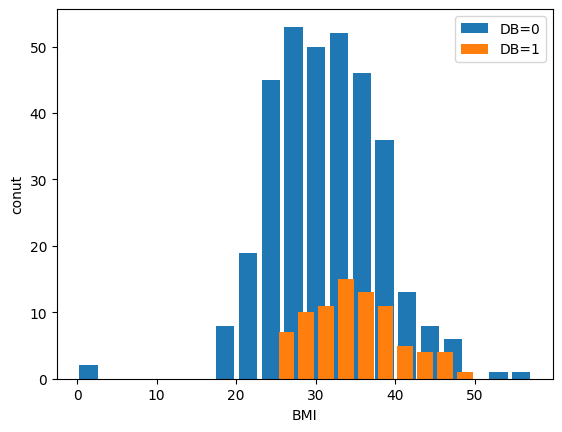

In [15]:
BMI_DB1 = df4[df4.Outcome==1]['BMI']
BMI_DB0 = df4[df4.Outcome==0]['BMI']
plt.hist(BMI_DB0,rwidth=0.8,bins=20,label='DB=0')
plt.hist(BMI_DB1,rwidth=0.8,label='DB=1')
plt.xlabel('BMI')
plt.ylabel('conut')
plt.legend()
plt.show()

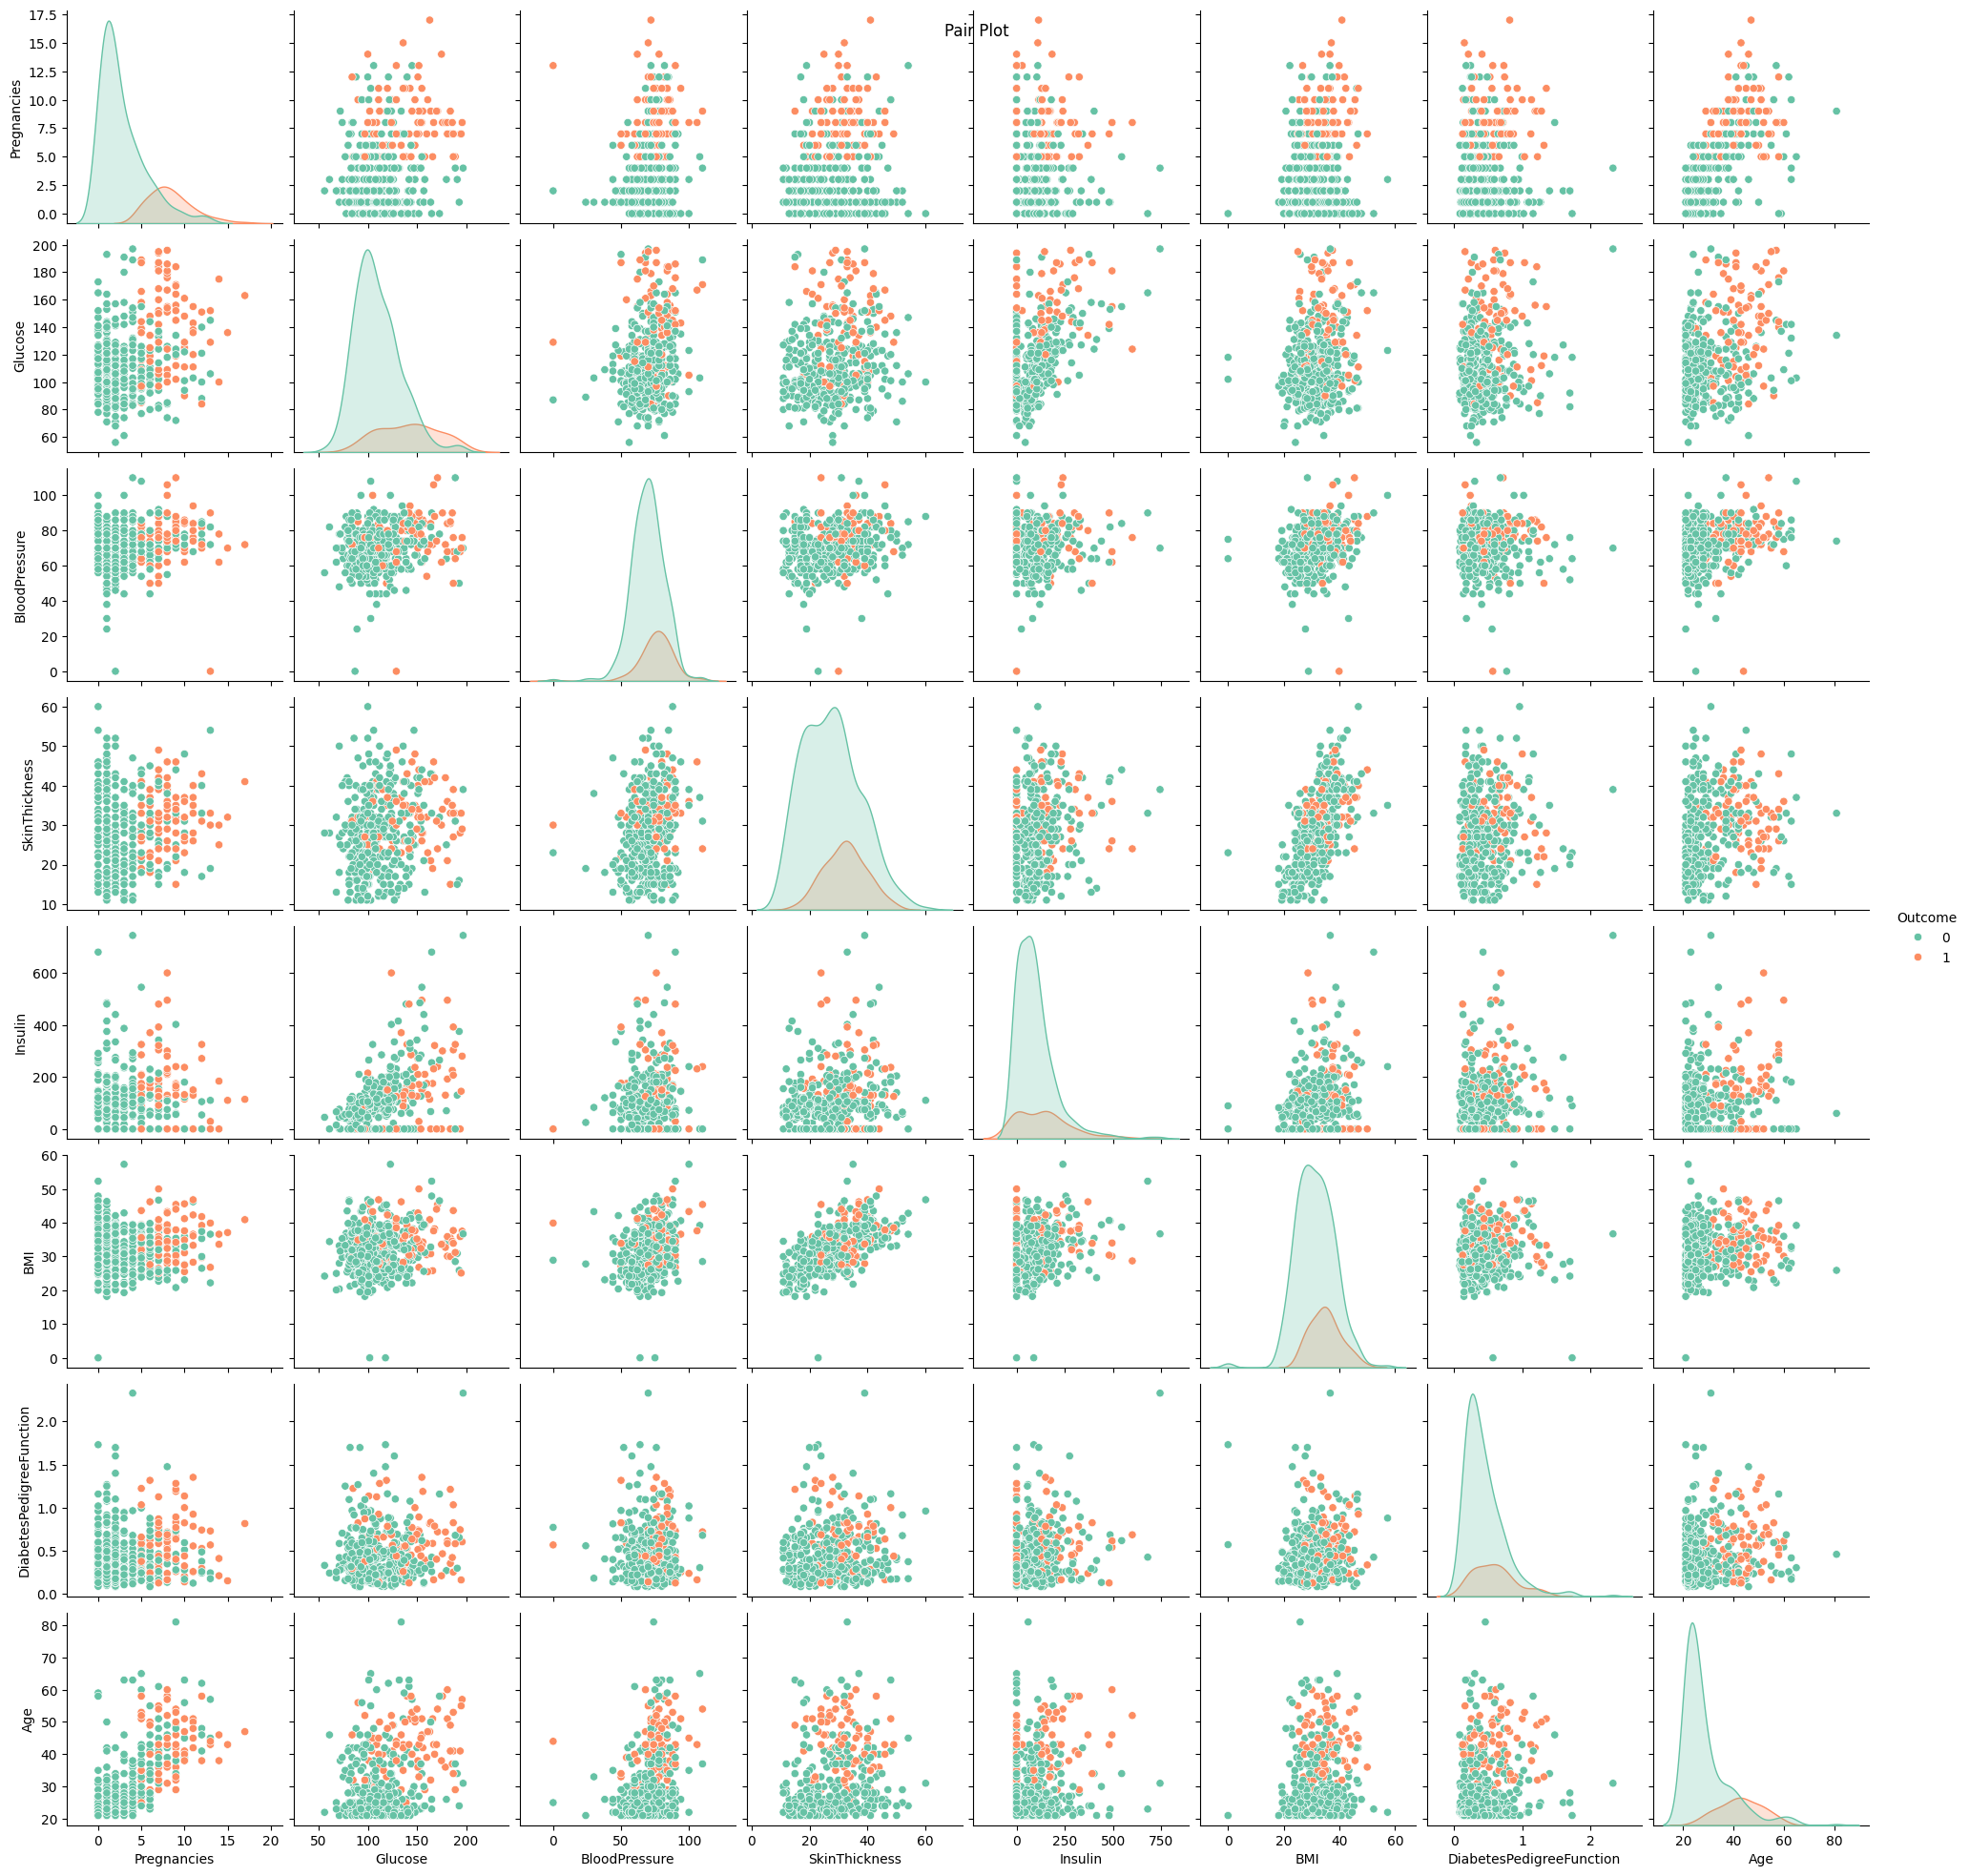

In [16]:
sns.pairplot(df4[cols],hue='Outcome',palette = 'Set2')
plt.suptitle("Pair Plot")
plt.show()

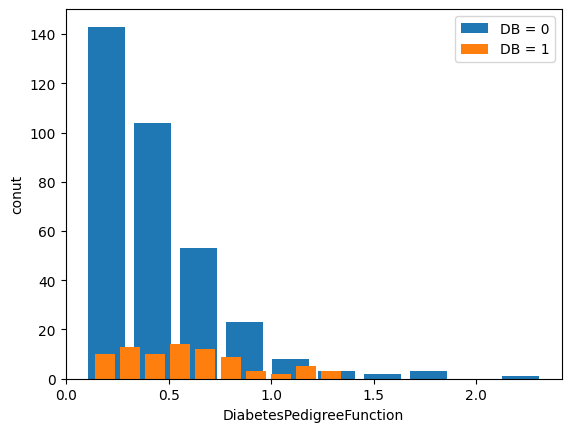

In [17]:
DBF_DB1 = df4[df4.Outcome==1]['DiabetesPedigreeFunction']
DBF_DB0 = df4[df4.Outcome==0]['DiabetesPedigreeFunction']
plt.hist(DBF_DB0,rwidth=0.8,label='DB = 0')
plt.hist(DBF_DB1,rwidth=0.8,label='DB = 1')
plt.xlabel('DiabetesPedigreeFunction')
plt.ylabel('conut')
plt.legend()
plt.show()

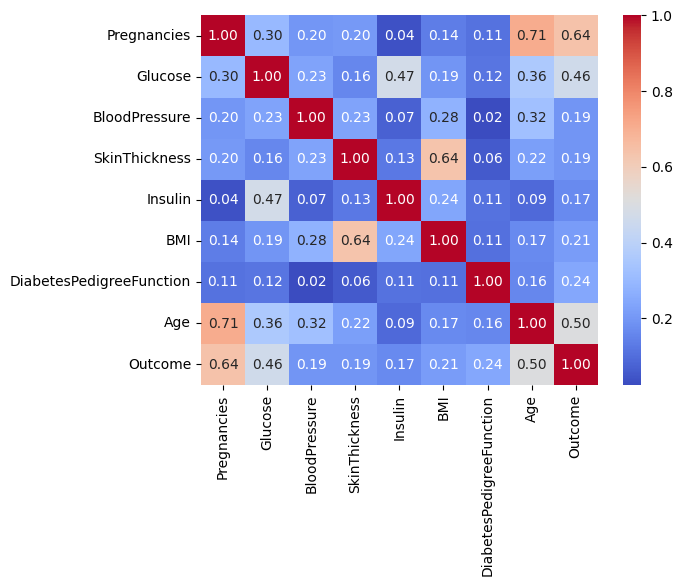

In [18]:
df5 = df4[~((df4.DiabetesPedigreeFunction>=1.5)& (df4.Outcome!=1))]
# df5 = df5[~((df5.DiabetesPedigreeFunction<0.5)& (df5.Outcome==1))]
correlation_matrix = df5.corr()
sns.heatmap(correlation_matrix,annot=True,cmap='coolwarm',fmt='.2f')
plt.show()

In [19]:
df5.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,416.000000,416.000000,416.000000,416.000000,416.000000,416.000000,416.000000,416.000000,416.000000
mean,3.882212,115.658654,70.901442,28.514423,102.555288,32.092788,0.456233,31.557692,0.194712
std,3.461746,27.468779,12.778649,9.603452,109.654185,6.702314,0.271886,10.909995,0.396455
min,0.000000,56.000000,0.000000,11.000000,0.000000,0.000000,0.085000,21.000000,0.000000
25%,1.000000,96.000000,64.000000,21.000000,0.000000,27.375000,0.253500,23.000000,0.000000
50%,3.000000,110.000000,72.000000,28.000000,78.000000,32.000000,0.399500,27.000000,0.000000
75%,6.000000,130.250000,78.500000,35.000000,146.500000,36.600000,0.605500,38.250000,0.000000
max,17.000000,196.000000,110.000000,60.000000,680.000000,57.300000,1.476000,81.000000,1.000000


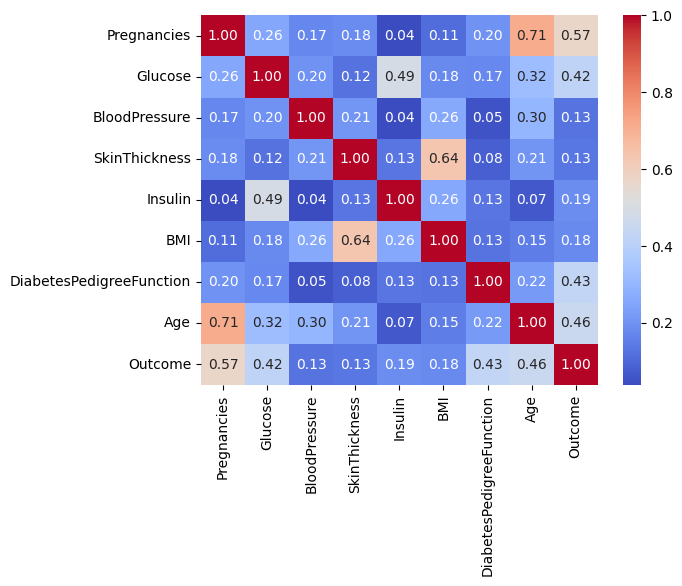

In [20]:
df6 = df5[~((df5.DiabetesPedigreeFunction<0.5)& (df5.Outcome==1))]
correlation_matrix = df6.corr()
sns.heatmap(correlation_matrix,annot=True,cmap='coolwarm',fmt='.2f')
plt.show()

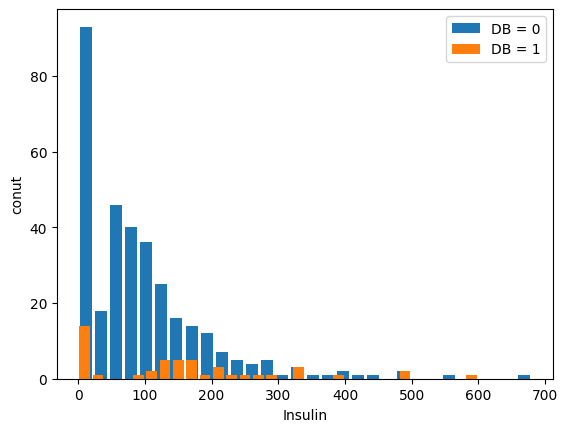

In [21]:
Insulin_DB1 = df6[df6.Outcome==1]['Insulin']
Insulin_DB0 = df6[df6.Outcome==0]['Insulin']
plt.hist(Insulin_DB0,bins=30,rwidth=0.8,label='DB = 0')
plt.hist(Insulin_DB1,bins=30,rwidth=0.8,label='DB = 1')
plt.xlabel('Insulin')
plt.ylabel('conut')
plt.legend()
plt.show()

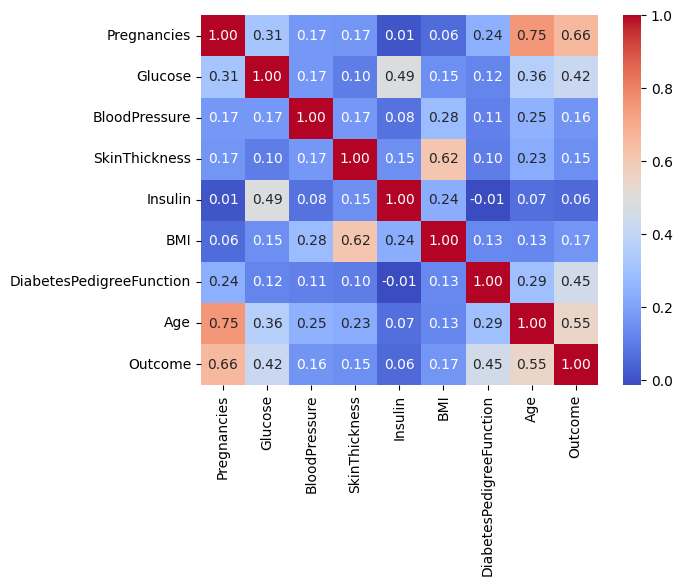

In [22]:
df7 = df6[~((df6.Insulin<50) & (df6.Outcome==0))]
# df7 = df7[~((df7.Insulin>300) & (df7.Outcome==1))]
correlation_matrix = df7.corr()
sns.heatmap(correlation_matrix,annot=True,cmap='coolwarm',fmt='.2f')
plt.show()

In [23]:
df7.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,265.000000,265.000000,265.000000,265.000000,265.000000,265.000000,265.000000,265.000000,265.000000
mean,3.652830,118.826415,70.226415,28.433962,141.962264,32.683019,0.513857,31.067925,0.181132
std,3.374403,26.773744,12.392326,10.022908,106.319837,6.553981,0.286948,10.714048,0.385856
min,0.000000,68.000000,0.000000,11.000000,0.000000,18.200000,0.085000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,20.000000,75.000000,27.800000,0.280000,23.000000,0.000000
50%,2.000000,115.000000,72.000000,28.000000,114.000000,32.800000,0.487000,27.000000,0.000000
75%,6.000000,134.000000,78.000000,35.000000,176.000000,36.900000,0.692000,37.000000,0.000000
max,17.000000,196.000000,110.000000,60.000000,680.000000,57.300000,1.400000,81.000000,1.000000


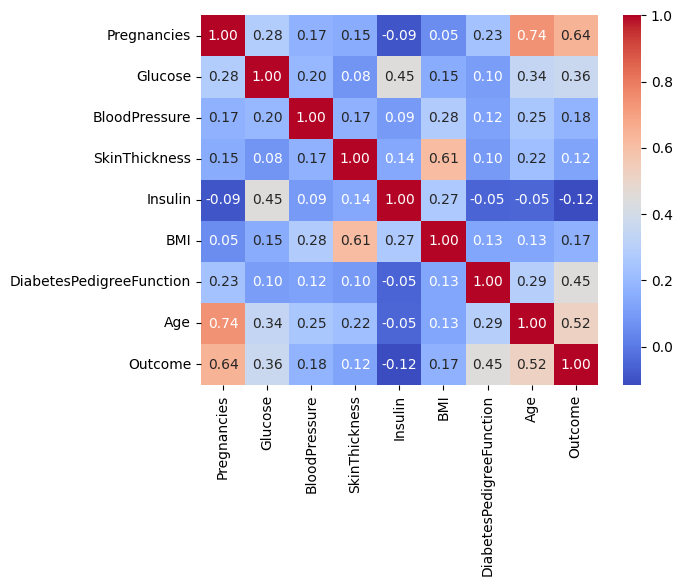

In [24]:
df8 = df7[~((df7.Insulin>300) & (df7.Outcome==1))]
correlation_matrix = df8.corr()
sns.heatmap(correlation_matrix,annot=True,cmap='coolwarm',fmt='.2f')
plt.show()

In [25]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
score_RF = cross_val_score(RandomForestClassifier(),df.drop(columns=['Outcome']),df.Outcome)
score_RF

array([0.74025974, 0.75974026, 0.74025974, 0.83660131, 0.75816993])

In [26]:
score_RF2 = cross_val_score(RandomForestClassifier(),df4.drop(columns=['Outcome','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction']),df4.Outcome)
score_RF2

array([0.88235294, 0.85714286, 0.85714286, 0.91666667, 0.85714286])

In [27]:
score_RF2 = cross_val_score(RandomForestClassifier(),df5.drop(columns=['Outcome','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction']),df5.Outcome)
score_RF2

array([0.86904762, 0.8313253 , 0.85542169, 0.91566265, 0.8313253 ])

In [28]:
score_RF2 = cross_val_score(RandomForestClassifier(),df6.drop(columns=['Outcome','BloodPressure','SkinThickness','Insulin','BMI']),df6.Outcome)
score_RF2

array([0.94805195, 0.92207792, 0.8961039 , 0.93421053, 0.96052632])

In [29]:
score_RF2 = cross_val_score(RandomForestClassifier(),df7.drop(columns=['Outcome','BloodPressure','SkinThickness','Insulin','BMI']),df7.Outcome)
score_RF2.mean()

0.9358490566037737

In [30]:
score_RF2 = cross_val_score(RandomForestClassifier(),df7.drop(columns=['Outcome','BloodPressure','SkinThickness']),df7.Outcome)
score_RF2.mean()

0.9471698113207546

In [31]:
score_RF2 = cross_val_score(RandomForestClassifier(),df8.drop(columns=['Outcome','BloodPressure']),df8.Outcome)
score_RF2.mean()

0.9536953242835595

In [32]:
from imblearn.over_sampling import SMOTE
X = df8.drop(columns=['Outcome'])
Y = df8.Outcome
# Define SMOTE
smote = SMOTE(sampling_strategy='auto', random_state=42, k_neighbors=5)

# Apply SMOTE to create synthetic samples
X_resampled, y_resampled = smote.fit_resample(X, Y)
X_resampled

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.600000,0.627000,50
1,1,89,66,23,94,28.100000,0.167000,21
2,5,166,72,19,175,25.800000,0.587000,51
3,1,103,30,38,83,43.300000,0.183000,33
4,3,126,88,41,235,39.300000,0.704000,27
...,...,...,...,...,...,...,...,...
429,7,120,73,31,121,31.330165,0.595179,30
430,8,188,85,27,268,39.763676,0.638239,56
431,10,111,83,33,0,39.189499,1.071073,47
432,5,115,74,29,0,32.318300,0.660153,35


In [33]:
score_RF2 = cross_val_score(RandomForestClassifier(),X_resampled,y_resampled)
score_RF2.mean()

0.9839080459770114

In [35]:
model = RandomForestClassifier()
model.fit(X_resampled,y_resampled)

RandomForestClassifier()

In [37]:
import joblib as jb
joblib.dump(model,"Diabetes.joblib")

['Diabetes.joblib']

In [38]:
y_resampled

0      1
1      0
2      1
3      0
4      0
      ..
429    1
430    1
431    1
432    1
433    1
Name: Outcome, Length: 434, dtype: int64

In [94]:
y_resampled[y_resampled==0].count()

217